In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [44]:
#Load Data
df=pd.read_csv("/content/.config/salary_data.csv")

In [45]:
#see the first 5 lines of our dataset
df.head(5)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [46]:
#see the information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


# Preparing Data

In [47]:
X= df[["YearsExperience"]]
y= df[["Salary"]]

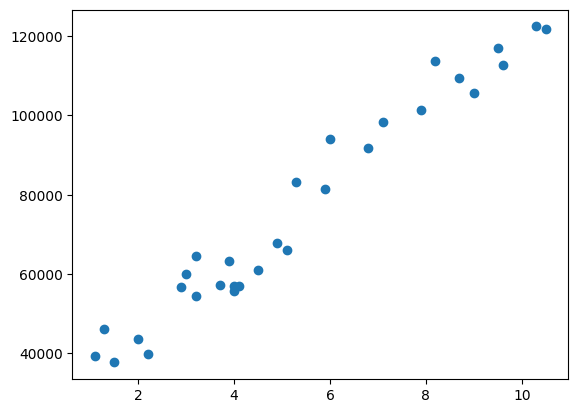

In [48]:
#display the relationship between X and y
plt.scatter(X, y)

In [ ]:
#split the dataset
X_train,X_test, y_train, y_test= train_test_split(X,y, test_size= 1/3, random_state= 0)

# Build and train a modele

In [61]:
Knn= KNeighborsRegressor(n_neighbors= 3, weights = "distance")

In [62]:
Knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3, weights='distance')

# Evaluate

In [63]:
y_predict = Knn.predict(X_test)

In [64]:
print('MAE:', metrics.mean_absolute_error(y_test, y_predict))
print('MSE:', metrics.mean_squared_error(y_test, y_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))
print('R**2:', metrics.r2_score(y_test, y_predict))
#print('var:',y_predict.var())

MAE: 4557.677444591007
MSE: 36167941.65648544
RMSE: 6013.978854010499
R**2: 0.9568507912137255


In [65]:
#Variance
print('var:',y_predict.var())


var: 794404444.8910024


In [66]:
# The score
score=Knn.score(X_test, y_test)
print('score: %f'  %score)


score: 0.956851


# Best value of K

In [67]:
neighbors= np.arange(1, 10)
train_accuracy= np.empty(len(neighbors))
test_accuracy= np.empty(len(neighbors))

for i, K in enumerate(neighbors):
  Knn=  KNeighborsRegressor(n_neighbors= K)
  Knn.fit(X_train, y_train)
  train_accuracy[i] = Knn.score(X_train, y_train)
  test_accuracy[i] = Knn.score(X_test, y_test)
  #print(test_accuracy)

In [68]:
print(test_accuracy)

[0.9100008  0.94828306 0.96332397 0.96291679 0.92717783 0.89328198
 0.85904347 0.77697417 0.71617795]


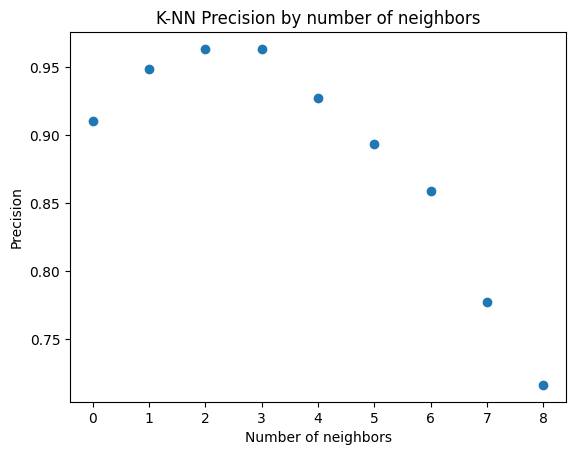

In [ ]:
#visualisation taux de precision
plt.plot(test_accuracy, 'o')
plt.title("K-NN Precision by number of neighbors")
plt.xlabel("Number of neighbors")
plt.ylabel("Precision")
plt.show()